In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np
from scipy import stats as sts
import json
sns.set_style('darkgrid')

# Анализ XOR(4)

In [111]:
def read_results(filename, show=False):
    # read data
    df = pd.read_parquet(filename)
    history_dict = df.T.to_dict()
    counter = df['success'].value_counts().to_dict()
    if True not in counter:
        counter[True] = 0
    if show:
        display(df.head())
    
    return df, history_dict, counter

## Pie

In [112]:
def prepare_pie(counter):
    counts = [counter[key] for key in sorted(counter.keys(), reverse=True)]
    labels = list(map(lambda x: 'success' if x else 'fail', sorted(counter.keys(), reverse=True)))
    colors = {'success': 'tab:green',
              'fail': 'tab:red'}
    return counts, labels, colors

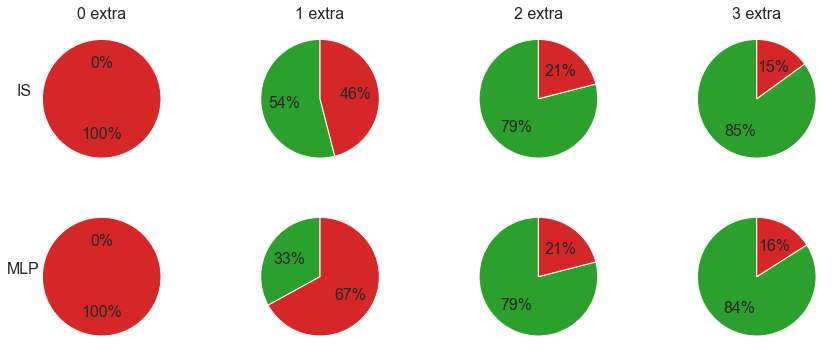

In [113]:
results_path = 'runs_results/xor_4/'

filenames = ['run_is_0_extra.parquet',
             'run_is_1_extra.parquet',
             'run_is_2_extra.parquet',
             'run_is_3_extra.parquet',
             'run_mlp_0_extra.parquet',
             'run_mlp_1_extra.parquet',
             'run_mlp_2_extra.parquet',
             'run_mlp_3_extra.parquet']

plt.figure(figsize = (15, 6))
for i in range(len(filenames)):
    _, _, counter = read_results(results_path + filenames[i])
    counts, labels, colors = prepare_pie(counter)
    plt.subplot(2, 4, i+1)
    plt.pie(x=counts, 
            # labels=labels,
            colors=[colors[key] for key in labels],
            startangle=90,
            autopct='%.0f%%',
            textprops={'fontsize': 16})
    if i == 0:
        plt.ylabel('IS', fontsize= 16, rotation=0)
    if i == 4:
        plt.ylabel('MLP', fontsize= 16, rotation=0)
    if i < 4:
        plt.title(f'{i} extra', fontsize= 16,)

plt.savefig(results_path+'pie.png', dpi=300)  
plt.show()

## Loss plots

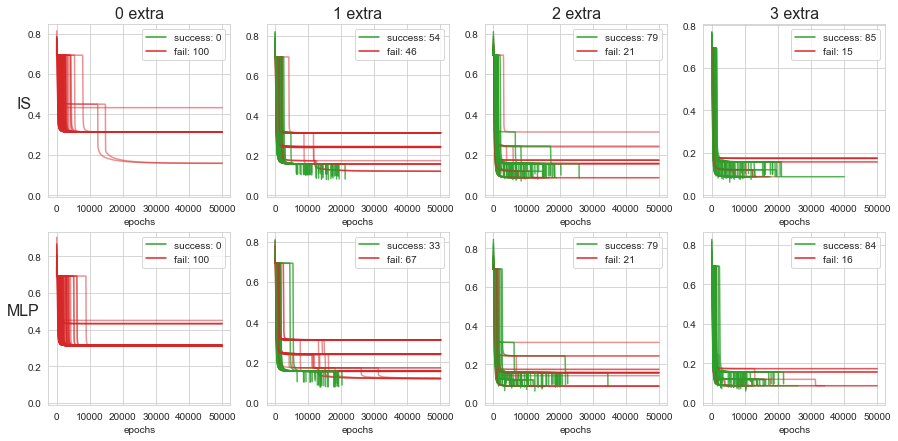

In [114]:
filenames = ['run_is_0_extra.parquet',
             'run_is_1_extra.parquet',
             'run_is_2_extra.parquet',
             'run_is_3_extra.parquet',
             'run_mlp_0_extra.parquet',
             'run_mlp_1_extra.parquet',
             'run_mlp_2_extra.parquet',
             'run_mlp_3_extra.parquet']

plt.figure(figsize = (15, 7))
for i in range(len(filenames)):
    _, history_dict, counter = read_results(results_path + filenames[i])

    legend_elements = [Line2D([0], [0], color='tab:green', label=f"success: {counter[True]}"),
                       Line2D([0], [0], color='tab:red', label=f"fail: {counter[False]}")]

    plt.subplot(2, 4, i+1)
    for j in history_dict:
        color = 'tab:green' if history_dict[j]['success'] else 'tab:red'
        alpha = 0.8 if history_dict[j]['success'] else 0.5
        plt.plot(history_dict[j]['history_loss'], color=color, alpha=alpha)
    plt.legend(handles=legend_elements)
    plt.ylim(-0.01)
    plt.xlabel('epochs')
    
    if i == 0:
        plt.ylabel('IS', fontsize= 16, rotation=0)
    if i == 4:
        plt.ylabel('MLP', fontsize= 16, rotation=0)
    if i < 4:
        plt.title(f'{i} extra', fontsize= 16)

plt.savefig(results_path+'loss_plots.png', dpi=300)    
plt.show()

## History length statistics

In [115]:
def get_success_len_stat(df):
    stat_succ_hist_len = df[df['success']]['history_len'].describe()
    
    return stat_succ_hist_len

In [116]:
stat_dict = {}
filenames = ['run_is_0_extra.parquet',
             'run_mlp_0_extra.parquet',
             'run_is_1_extra.parquet',
             'run_mlp_1_extra.parquet',
             'run_is_2_extra.parquet',
             'run_mlp_2_extra.parquet',
             'run_is_3_extra.parquet',
             'run_mlp_3_extra.parquet']

for i in range(len(filenames)):
    df, _, _ = read_results(results_path + filenames[i])
    
    name = filenames[i][4:-8]
    
    stats = get_success_len_stat(df)
    
    stat_dict[name] = stats
    
full_stat = pd.DataFrame(data=stat_dict,
                         index = stat_dict['is_0_extra'].index)
display(full_stat)
    
    

,is_0_extra,mlp_0_extra,is_1_extra,mlp_1_extra,is_2_extra,mlp_2_extra,is_3_extra,mlp_3_extra
count,0.0,0.0,54.000000,33.000000,79.000000,79.000000,85.000000,84.000000
mean,NaN,NaN,13190.574074,14536.666667,8813.253165,10726.379747,7204.129412,7398.273810
std,NaN,NaN,4092.096946,3598.796419,5520.975472,7059.543951,6901.899657,5921.835224
min,NaN,NaN,6440.000000,6680.000000,796.000000,706.000000,321.000000,302.000000
25%,NaN,NaN,9696.500000,12118.000000,5011.000000,4960.000000,1931.000000,1852.000000
50%,NaN,NaN,13395.500000,13945.000000,7003.000000,9427.000000,5409.000000,7456.500000
75%,NaN,NaN,17089.000000,18019.000000,12644.500000,17183.500000,10139.000000,10343.250000
max,NaN,NaN,21181.000000,20248.000000,25913.000000,34610.000000,40032.000000,26065.000000


## History lengths distribution

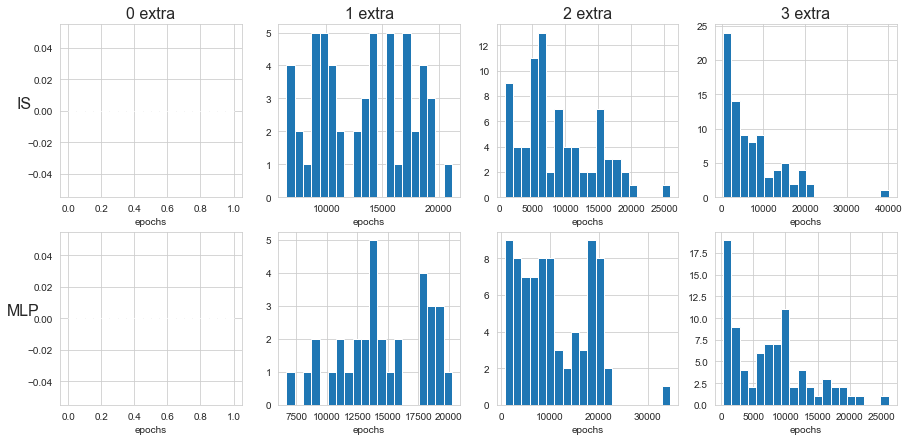

In [117]:
filenames = ['run_is_0_extra.parquet',
             'run_is_1_extra.parquet',
             'run_is_2_extra.parquet',
             'run_is_3_extra.parquet',
             'run_mlp_0_extra.parquet',
             'run_mlp_1_extra.parquet',
             'run_mlp_2_extra.parquet',
             'run_mlp_3_extra.parquet']

plt.figure(figsize = (15, 7))
for i in range(len(filenames)):
    df, _, _ = read_results(results_path + filenames[i])
    plt.subplot(2, 4, i+1)
    df[df['success']]['history_len'].hist(bins=20)
    if i == 0:
        plt.ylabel('IS', fontsize= 16, rotation=0)
    if i == 4:
        plt.ylabel('MLP', fontsize= 16, rotation=0)
    if i < 4:
        plt.title(f'{i} extra', fontsize= 16)
    plt.xlabel('epochs')

In [118]:
filenames = ['run_is_1_extra.parquet',
             'run_is_2_extra.parquet',
             'run_is_3_extra.parquet',
             'run_mlp_1_extra.parquet',
             'run_mlp_2_extra.parquet',
             'run_mlp_3_extra.parquet']

hist_len = []
extra = []
alg_types = []
for i in range(len(filenames)):
    df, _, _ = read_results(results_path + filenames[i])
    lengths = df[df['success']]['history_len'].tolist()
    num_extra = [int(filenames[i][-15:-14]) for _ in range(len(lengths))]
    
    if '_is_' in filenames[i]:
        alg_types += ['IS' for _ in range(len(lengths))]
    if '_mlp_' in filenames[i]:
        alg_types += ['MLP' for _ in range(len(lengths))]
    
    hist_len += lengths
    extra += num_extra
    
distr_df = pd.DataFrame(data={'hist_len': hist_len,
                              'extra': extra,
                              'type': alg_types})

In [119]:
means = distr_df.groupby(by=['extra','type']).agg(['mean'])
is_mean_1_extra = means.iloc[0,0]
mlp_mean_1_extra = means.iloc[1,0]
is_mean_2_extra = means.iloc[2,0]
mlp_mean_2_extra = means.iloc[3,0]
is_mean_3_extra = means.iloc[4,0]
mlp_mean_3_extra = means.iloc[5,0]
means

hist_len
                    mean
extra type              
1     IS    13190.574074
      MLP   14536.666667
2     IS     8813.253165
      MLP   10726.379747
3     IS     7204.129412
      MLP    7398.273810

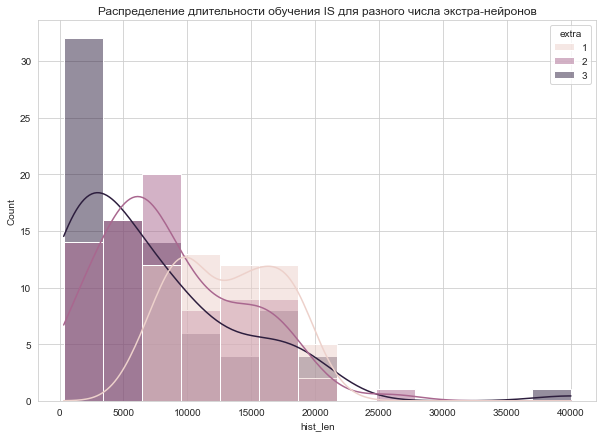

In [120]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
plt.title('Распределение длительности обучения IS для разного числа экстра-нейронов')
sns.histplot(distr_df[distr_df['type'] == 'IS'], x='hist_len', hue='extra', kde=True)
plt.show()

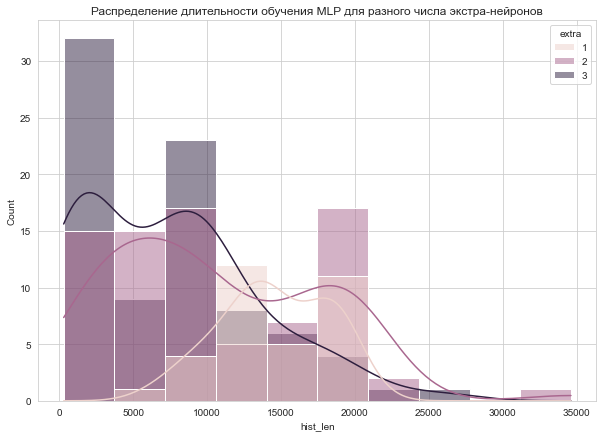

In [121]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
plt.title('Распределение длительности обучения MLP для разного числа экстра-нейронов')
sns.histplot(distr_df[distr_df['type'] == 'MLP'], x='hist_len', hue='extra', kde=True)
plt.show()

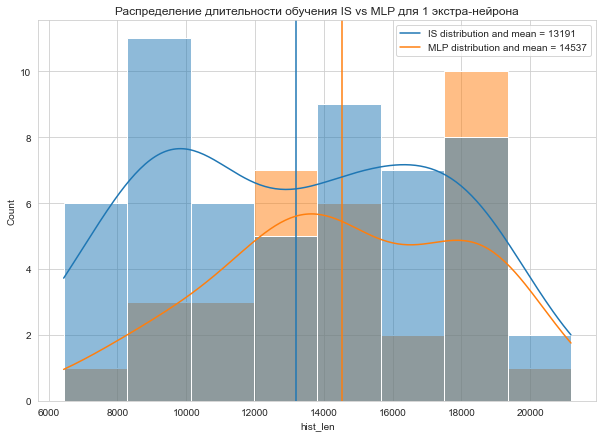

In [122]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
plt.title('Распределение длительности обучения IS vs MLP для 1 экстра-нейрона')
plt.axvline(is_mean_1_extra, color='tab:blue', label=f'IS distribution and mean = {is_mean_1_extra:.0f}')
plt.axvline(mlp_mean_1_extra, color='tab:orange', label=f'MLP distribution and mean = {mlp_mean_1_extra:.0f}')
sns.histplot(distr_df[distr_df['extra'] == 1], x='hist_len', hue='type', kde=True)
plt.legend()
plt.savefig(results_path+'lengths_distribution_1_extra.png', dpi=300) 
plt.show()

In [123]:
len_is_1 = distr_df[(distr_df['extra'] == 1) & (distr_df['type'] == "IS")]['hist_len'].values
len_mlp_1 = distr_df[(distr_df['extra'] == 1) & (distr_df['type'] == "MLP")]['hist_len'].values
_, p_mw = sts.mannwhitneyu(len_is_1, len_mlp_1, alternative='less')
_, p_tt = sts.ttest_ind(len_is_1, len_mlp_1, alternative='less')
print(f'Mann-Whitney U test p-value: {p_mw:.5f}\nT-test p-value: {p_tt:.5f}')

Mann-Whitney U test p-value: 0.06678
T-test p-value: 0.06164


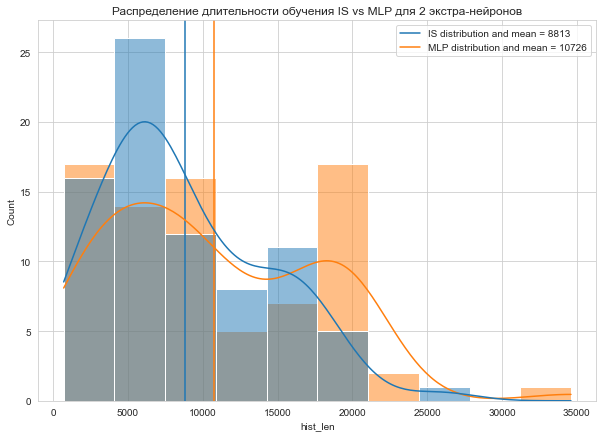

In [124]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
plt.title('Распределение длительности обучения IS vs MLP для 2 экстра-нейронов')
plt.axvline(is_mean_2_extra, color='tab:blue', label=f'IS distribution and mean = {is_mean_2_extra:.0f}')
plt.axvline(mlp_mean_2_extra, color='tab:orange', label=f'MLP distribution and mean = {mlp_mean_2_extra:.0f}')
sns.histplot(distr_df[distr_df['extra'] == 2], x='hist_len', hue='type', kde=True)
plt.legend()
plt.savefig(results_path+'lengths_distribution_2_extra.png', dpi=300) 
plt.show()

In [125]:
len_is_2 = distr_df[(distr_df['extra'] == 2) & (distr_df['type'] == "IS")]['hist_len'].values
len_mlp_2 = distr_df[(distr_df['extra'] == 2) & (distr_df['type'] == "MLP")]['hist_len'].values
_, p_mw = sts.mannwhitneyu(len_is_2, len_mlp_2, alternative='less')
_, p_tt = sts.ttest_ind(len_is_2, len_mlp_2, alternative='less')
print(f'Mann-Whitney U test p-value: {p_mw:.5f}\nT-test p-value: {p_tt:.5f}')

Mann-Whitney U test p-value: 0.05640
T-test p-value: 0.02981


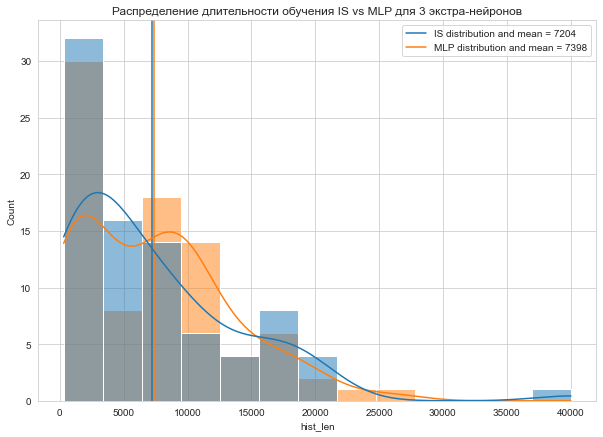

In [126]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
plt.title('Распределение длительности обучения IS vs MLP для 3 экстра-нейронов')
plt.axvline(is_mean_3_extra, color='tab:blue', label=f'IS distribution and mean = {is_mean_3_extra:.0f}')
plt.axvline(mlp_mean_3_extra, color='tab:orange', label=f'MLP distribution and mean = {mlp_mean_3_extra:.0f}')
sns.histplot(distr_df[distr_df['extra'] == 3], x='hist_len', hue='type', kde=True)
plt.legend()
plt.savefig(results_path+'lengths_distribution_3_extra.png', dpi=300) 
plt.show()

In [127]:
len_is_3 = distr_df[(distr_df['extra'] == 3) & (distr_df['type'] == "IS")]['hist_len'].values
len_mlp_3 = distr_df[(distr_df['extra'] == 3) & (distr_df['type'] == "MLP")]['hist_len'].values
_, p_mw = sts.mannwhitneyu(len_is_3, len_mlp_3, alternative='less')
_, p_tt = sts.ttest_ind(len_is_3, len_mlp_3, alternative='less')
print(f'Mann-Whitney U test p-value: {p_mw:.5f}\nT-test p-value: {p_tt:.5f}')

Mann-Whitney U test p-value: 0.25403
T-test p-value: 0.42237


# Анализ Bent(4)

In [128]:
def read_results(filename, show=False):
    # read data
    df = pd.read_parquet(filename)
    history_dict = df.T.to_dict()
    counter = df['success'].value_counts().to_dict()
    if True not in counter:
        counter[True] = 0
    if False not in counter:
        counter[False] = 0
    if show:
        display(df.head())
    
    return df, history_dict, counter

## Pie

In [129]:
def prepare_pie(counter):
    counts = [counter[key] for key in sorted(counter.keys(), reverse=True)]
    labels = list(map(lambda x: 'success' if x else 'fail', sorted(counter.keys(), reverse=True)))
    colors = {'success': 'tab:green',
              'fail': 'tab:red'}
    return counts, labels, colors

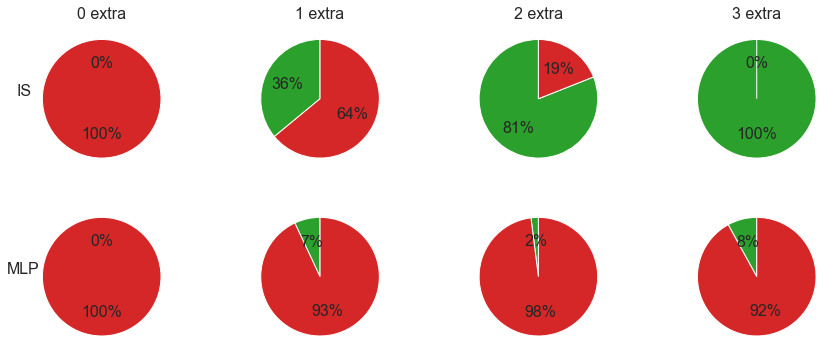

In [130]:
results_path = 'runs_results/bent1/'

filenames = ['run_is_0_extra.parquet',
             'run_is_1_extra.parquet',
             'run_is_2_extra.parquet',
             'run_is_3_extra.parquet',
             'run_mlp_0_extra.parquet',
             'run_mlp_1_extra.parquet',
             'run_mlp_2_extra.parquet',
             'run_mlp_3_extra.parquet']

plt.figure(figsize = (15, 6))
for i in range(len(filenames)):
    _, _, counter = read_results(results_path + filenames[i])
    counts, labels, colors = prepare_pie(counter)
    plt.subplot(2, 4, i+1)
    plt.pie(x=counts, 
            # labels=labels,
            colors=[colors[key] for key in labels],
            startangle=90,
            autopct='%.0f%%',
            textprops={'fontsize': 16})
    if i == 0:
        plt.ylabel('IS', fontsize= 16, rotation=0)
    if i == 4:
        plt.ylabel('MLP', fontsize= 16, rotation=0)
    if i < 4:
        plt.title(f'{i} extra', fontsize= 16,)

plt.savefig(results_path+'pie.png', dpi=300)  
plt.show()

## Loss plots

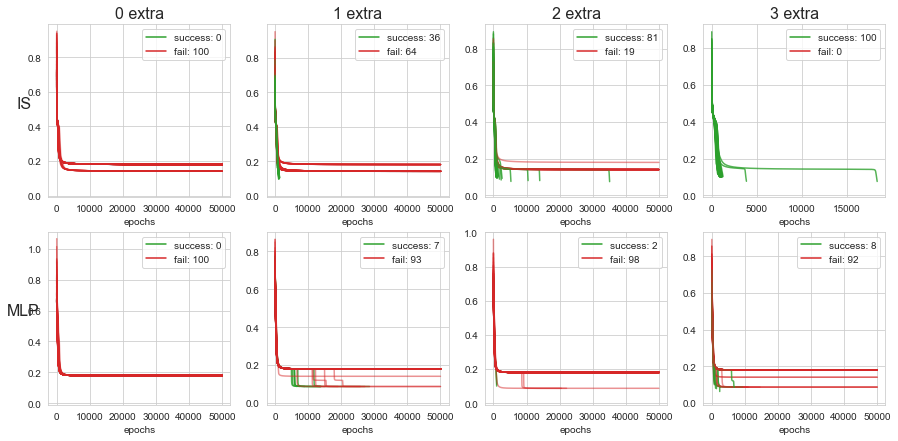

In [131]:
filenames = ['run_is_0_extra.parquet',
             'run_is_1_extra.parquet',
             'run_is_2_extra.parquet',
             'run_is_3_extra.parquet',
             'run_mlp_0_extra.parquet',
             'run_mlp_1_extra.parquet',
             'run_mlp_2_extra.parquet',
             'run_mlp_3_extra.parquet']

plt.figure(figsize = (15, 7))
for i in range(len(filenames)):
    _, history_dict, counter = read_results(results_path + filenames[i])

    legend_elements = [Line2D([0], [0], color='tab:green', label=f"success: {counter[True]}"),
                       Line2D([0], [0], color='tab:red', label=f"fail: {counter[False]}")]

    plt.subplot(2, 4, i+1)
    for j in history_dict:
        color = 'tab:green' if history_dict[j]['success'] else 'tab:red'
        alpha = 0.8 if history_dict[j]['success'] else 0.5
        plt.plot(history_dict[j]['history_loss'], color=color, alpha=alpha)
    plt.legend(handles=legend_elements)
    plt.ylim(-0.01)
    plt.xlabel('epochs')
    
    if i == 0:
        plt.ylabel('IS', fontsize= 16, rotation=0)
    if i == 4:
        plt.ylabel('MLP', fontsize= 16, rotation=0)
    if i < 4:
        plt.title(f'{i} extra', fontsize= 16)

plt.savefig(results_path+'loss_plots.png', dpi=300)    
plt.show()

## History length statistics

In [132]:
def get_success_len_stat(df):
    stat_succ_hist_len = df[df['success']]['history_len'].describe()
    
    return stat_succ_hist_len

In [133]:
stat_dict = {}
filenames = ['run_is_0_extra.parquet',
             'run_mlp_0_extra.parquet',
             'run_is_1_extra.parquet',
             'run_mlp_1_extra.parquet',
             'run_is_2_extra.parquet',
             'run_mlp_2_extra.parquet',
             'run_is_3_extra.parquet',
             'run_mlp_3_extra.parquet']

for i in range(len(filenames)):
    df, _, _ = read_results(results_path + filenames[i])
    
    name = filenames[i][4:-8]
    
    stats = get_success_len_stat(df)
    
    stat_dict[name] = stats
    
full_stat = pd.DataFrame(data=stat_dict,
                         index = stat_dict['is_0_extra'].index)
display(full_stat)
    
    

,is_0_extra,mlp_0_extra,is_1_extra,mlp_1_extra,is_2_extra,mlp_2_extra,is_3_extra,mlp_3_extra
count,0.0,0.0,36.000000,7.000000,81.000000,2.000000,100.000000,8.000000
mean,NaN,NaN,1164.222222,13302.000000,1764.098765,999.000000,1054.690000,3160.250000
std,NaN,NaN,159.079156,7410.611401,4188.294953,14.142136,1780.474087,3178.403991
min,NaN,NaN,630.000000,6664.000000,507.000000,989.000000,497.000000,767.000000
25%,NaN,NaN,1146.000000,8255.500000,817.000000,994.000000,736.500000,1059.750000
50%,NaN,NaN,1188.500000,13655.000000,969.000000,999.000000,854.000000,1915.500000
75%,NaN,NaN,1261.750000,13863.500000,1214.000000,1004.000000,950.000000,3660.750000
max,NaN,NaN,1348.000000,28557.000000,35124.000000,1009.000000,18362.000000,9320.000000


## History lengths distribution

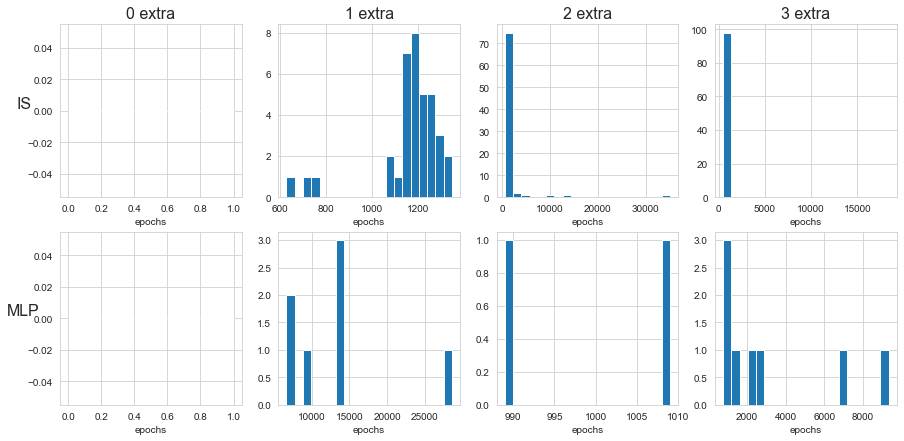

In [134]:
filenames = ['run_is_0_extra.parquet',
             'run_is_1_extra.parquet',
             'run_is_2_extra.parquet',
             'run_is_3_extra.parquet',
             'run_mlp_0_extra.parquet',
             'run_mlp_1_extra.parquet',
             'run_mlp_2_extra.parquet',
             'run_mlp_3_extra.parquet']

plt.figure(figsize = (15, 7))
for i in range(len(filenames)):
    df, _, _ = read_results(results_path + filenames[i])
    plt.subplot(2, 4, i+1)
    df[df['success']]['history_len'].hist(bins=20)
    if i == 0:
        plt.ylabel('IS', fontsize= 16, rotation=0)
    if i == 4:
        plt.ylabel('MLP', fontsize= 16, rotation=0)
    if i < 4:
        plt.title(f'{i} extra', fontsize= 16)
    plt.xlabel('epochs')

In [135]:
filenames = ['run_is_1_extra.parquet',
             'run_is_2_extra.parquet',
             'run_is_3_extra.parquet',
             'run_mlp_1_extra.parquet',
             'run_mlp_2_extra.parquet',
             'run_mlp_3_extra.parquet']

hist_len = []
extra = []
alg_types = []
for i in range(len(filenames)):
    df, _, _ = read_results(results_path + filenames[i])
    lengths = df[df['success']]['history_len'].tolist()
    num_extra = [int(filenames[i][-15:-14]) for _ in range(len(lengths))]
    
    if '_is_' in filenames[i]:
        alg_types += ['IS' for _ in range(len(lengths))]
    if '_mlp_' in filenames[i]:
        alg_types += ['MLP' for _ in range(len(lengths))]
    
    hist_len += lengths
    extra += num_extra
    
distr_df = pd.DataFrame(data={'hist_len': hist_len,
                              'extra': extra,
                              'type': alg_types})

In [136]:
means = distr_df.groupby(by=['extra','type']).agg(['mean'])
is_mean_1_extra = means.iloc[0,0]
mlp_mean_1_extra = means.iloc[1,0]
is_mean_2_extra = means.iloc[2,0]
mlp_mean_2_extra = means.iloc[3,0]
is_mean_3_extra = means.iloc[4,0]
mlp_mean_3_extra = means.iloc[5,0]
means

hist_len
                    mean
extra type              
1     IS     1164.222222
      MLP   13302.000000
2     IS     1764.098765
      MLP     999.000000
3     IS     1054.690000
      MLP    3160.250000

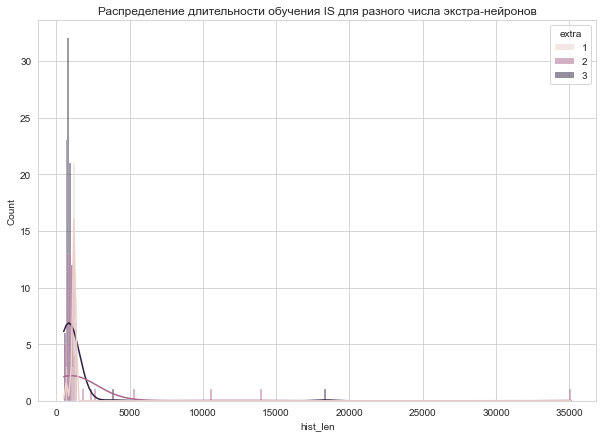

In [137]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
plt.title('Распределение длительности обучения IS для разного числа экстра-нейронов')
sns.histplot(distr_df[distr_df['type'] == 'IS'], x='hist_len', hue='extra', kde=True)
plt.show()

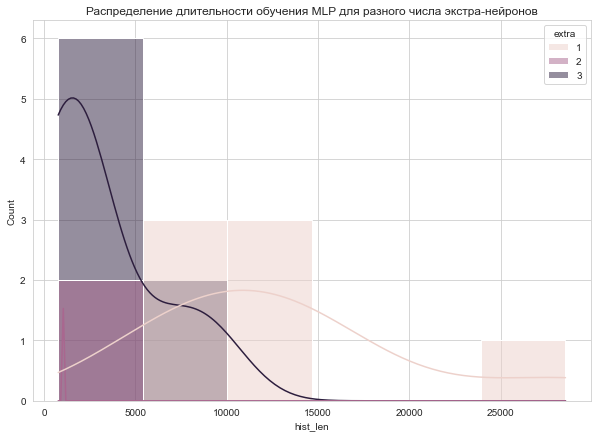

In [138]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
plt.title('Распределение длительности обучения MLP для разного числа экстра-нейронов')
sns.histplot(distr_df[distr_df['type'] == 'MLP'], x='hist_len', hue='extra', kde=True)
plt.show()

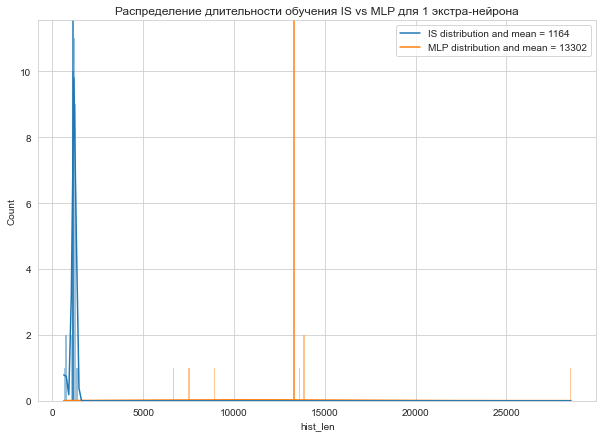

In [139]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
plt.title('Распределение длительности обучения IS vs MLP для 1 экстра-нейрона')
plt.axvline(is_mean_1_extra, color='tab:blue', label=f'IS distribution and mean = {is_mean_1_extra:.0f}')
plt.axvline(mlp_mean_1_extra, color='tab:orange', label=f'MLP distribution and mean = {mlp_mean_1_extra:.0f}')
sns.histplot(distr_df[distr_df['extra'] == 1], x='hist_len', hue='type', kde=True)
plt.legend()
plt.savefig(results_path+'lengths_distribution_1_extra.png', dpi=300) 
plt.show()

In [140]:
len_is_1 = distr_df[(distr_df['extra'] == 1) & (distr_df['type'] == "IS")]['hist_len'].values
len_mlp_1 = distr_df[(distr_df['extra'] == 1) & (distr_df['type'] == "MLP")]['hist_len'].values
_, p_mw = sts.mannwhitneyu(len_is_1, len_mlp_1, alternative='less')
_, p_tt = sts.ttest_ind(len_is_1, len_mlp_1, alternative='less')
print(f'Mann-Whitney U test p-value: {p_mw:.5f}\nT-test p-value: {p_tt:.5f}')

Mann-Whitney U test p-value: 0.00002
T-test p-value: 0.00000


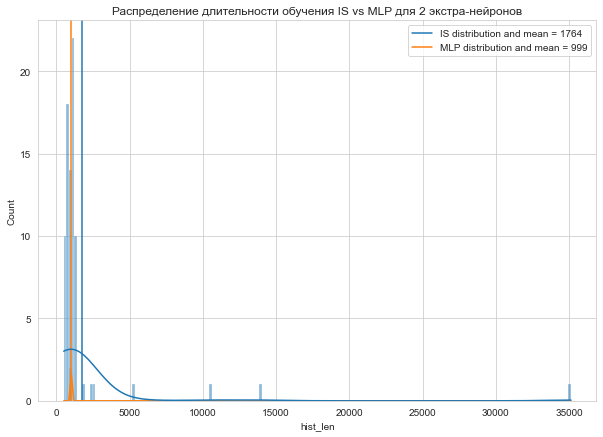

In [141]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
plt.title('Распределение длительности обучения IS vs MLP для 2 экстра-нейронов')
plt.axvline(is_mean_2_extra, color='tab:blue', label=f'IS distribution and mean = {is_mean_2_extra:.0f}')
plt.axvline(mlp_mean_2_extra, color='tab:orange', label=f'MLP distribution and mean = {mlp_mean_2_extra:.0f}')
sns.histplot(distr_df[distr_df['extra'] == 2], x='hist_len', hue='type', kde=True)
plt.legend()
plt.savefig(results_path+'lengths_distribution_2_extra.png', dpi=300) 
plt.show()

In [142]:
len_is_2 = distr_df[(distr_df['extra'] == 2) & (distr_df['type'] == "IS")]['hist_len'].values
len_mlp_2 = distr_df[(distr_df['extra'] == 2) & (distr_df['type'] == "MLP")]['hist_len'].values
_, p_mw = sts.mannwhitneyu(len_is_2, len_mlp_2, alternative='less')
_, p_tt = sts.ttest_ind(len_is_2, len_mlp_2, alternative='less')
print(f'Mann-Whitney U test p-value: {p_mw:.5f}\nT-test p-value: {p_tt:.5f}')

Mann-Whitney U test p-value: 0.49408
T-test p-value: 0.60101


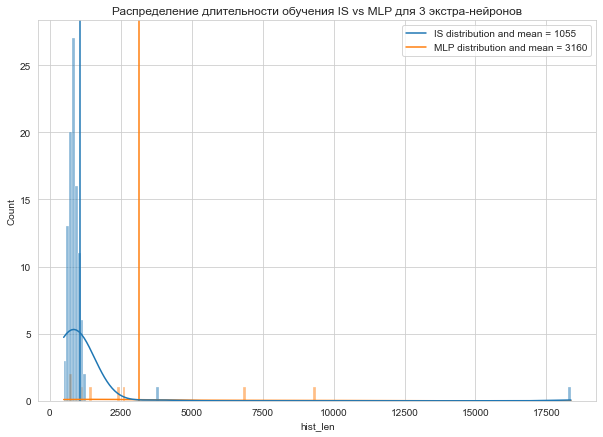

In [143]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
plt.title('Распределение длительности обучения IS vs MLP для 3 экстра-нейронов')
plt.axvline(is_mean_3_extra, color='tab:blue', label=f'IS distribution and mean = {is_mean_3_extra:.0f}')
plt.axvline(mlp_mean_3_extra, color='tab:orange', label=f'MLP distribution and mean = {mlp_mean_3_extra:.0f}')
sns.histplot(distr_df[distr_df['extra'] == 3], x='hist_len', hue='type', kde=True)
plt.legend()
plt.savefig(results_path+'lengths_distribution_3_extra.png', dpi=300) 
plt.show()

In [144]:
len_is_3 = distr_df[(distr_df['extra'] == 3) & (distr_df['type'] == "IS")]['hist_len'].values
len_mlp_3 = distr_df[(distr_df['extra'] == 3) & (distr_df['type'] == "MLP")]['hist_len'].values
_, p_mw = sts.mannwhitneyu(len_is_3, len_mlp_3, alternative='less')
_, p_tt = sts.ttest_ind(len_is_3, len_mlp_3, alternative='less')
print(f'Mann-Whitney U test p-value: {p_mw:.5f}\nT-test p-value: {p_tt:.5f}')

Mann-Whitney U test p-value: 0.00165
T-test p-value: 0.00164


# Анализ XOR(2)

## Pie

In [145]:
def read_results(filename, show=False):
    # read data
    df = pd.read_csv(filename)
    history_dict = df.T.to_dict()
    counter = df['success'].value_counts().to_dict()
    if True not in counter:
        counter[True] = 0
    if show:
        display(df.head())
    
    return df, history_dict, counter

In [146]:
def prepare_pie(counter):
    counts = [counter[key] for key in sorted(counter.keys(), reverse=True)]
    labels = list(map(lambda x: 'success' if x else 'fail', sorted(counter.keys(), reverse=True)))
    colors = {'success': 'tab:green',
              'fail': 'tab:red'}
    return counts, labels, colors

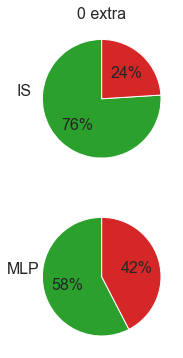

In [147]:
results_path = 'runs_results/xor_2/'

filenames = ['run_is_1000.parquet',
             'run_mlp_1000.parquet']

plt.figure(figsize = (3, 6))
for i in range(len(filenames)):
    _, _, counter = read_results(results_path + filenames[i])
    counts, labels, colors = prepare_pie(counter)
    plt.subplot(2, 1, i+1)
    plt.pie(x=counts, 
            # labels=labels,
            colors=[colors[key] for key in labels],
            startangle=90,
            autopct='%.0f%%',
            textprops={'fontsize': 16})
    if i == 0:
        plt.ylabel('IS', fontsize= 16, rotation=0)
        plt.title(f'0 extra', fontsize= 16,)
    if i == 1:
        plt.ylabel('MLP', fontsize= 16, rotation=0)
    
plt.savefig(results_path+'pie.png', dpi=300)  
plt.show()

## Loss plots

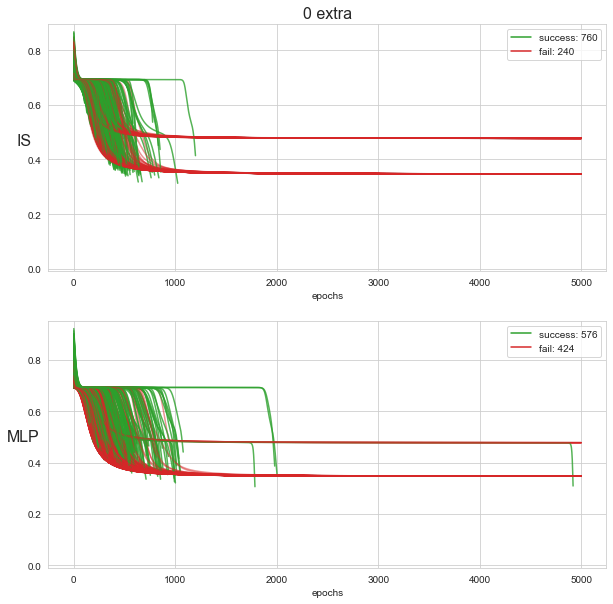

In [148]:
filenames = ['run_is_1000.parquet',
             'run_mlp_1000.parquet']

plt.figure(figsize = (10, 10))
for i in range(len(filenames)):
    _, history_dict, counter = read_results(results_path + filenames[i])

    legend_elements = [Line2D([0], [0], color='tab:green', label=f"success: {counter[True]}"),
                       Line2D([0], [0], color='tab:red', label=f"fail: {counter[False]}")]

    plt.subplot(2, 1, i+1)
    for j in history_dict:
        color = 'tab:green' if history_dict[j]['success'] else 'tab:red'
        alpha = 0.8 if history_dict[j]['success'] else 0.5
        plt.plot(json.loads(history_dict[j]['history_loss']), color=color, alpha=alpha)
    plt.legend(handles=legend_elements, loc='upper right')
    plt.ylim(-0.01)
    plt.xlabel('epochs')
    
    if i == 0:
        plt.ylabel('IS', fontsize= 16, rotation=0)
        plt.title(f'0 extra', fontsize= 16,)
    if i == 1:
        plt.ylabel('MLP', fontsize= 16, rotation=0)
        
plt.savefig(results_path+'loss_plots.png', dpi=300)    
plt.show()

## History length statistics

In [149]:
def get_success_len_stat(df):
    stat_succ_hist_len = df[df['success']]['history_len'].describe()
    
    return stat_succ_hist_len

In [150]:
stat_dict = {}
filenames = ['run_is_1000.parquet',
             'run_mlp_1000.parquet']

for i in range(len(filenames)):
    df, _, _ = read_results(results_path + filenames[i])
    
    name = filenames[i][4:-8]
    
    stats = get_success_len_stat(df)
    
    stat_dict[name] = stats
    
full_stat = pd.DataFrame(data=stat_dict,
                         index = stat_dict['is_1000'].index)
display(full_stat)
    
    

,is_1000,mlp_1000
count,760.000000,576.000000
mean,282.313158,359.164931
std,137.280780,289.703583
min,62.000000,111.000000
25%,182.000000,219.000000
50%,264.000000,300.500000
75%,353.500000,398.500000
max,1200.000000,4921.000000


In [151]:
df, _, _ = read_results(results_path + filenames[0])
lengths_is = df[df['success']==True]['history_len'].values

df, _, _ = read_results(results_path + filenames[1])
lengths_mlp = df[df['success']==True]['history_len'].values

In [152]:
sts.ttest_ind(lengths_is, lengths_mlp, alternative='less')

Ttest_indResult(statistic=-6.423747460756754, pvalue=9.226370665910856e-11)

In [153]:
sts.mannwhitneyu(lengths_is, lengths_mlp, alternative='less')

MannwhitneyuResult(statistic=178917.0, pvalue=5.258159071703432e-09)

In [154]:
lengths_is.mean(), lengths_mlp.mean()

(282.31315789473683, 359.16493055555554)

## History lengths distribution

In [155]:
alg_types = ['IS' for _ in range(len(lengths_is))] + ['MLP' for _ in range(len(lengths_mlp))]
hist_len = np.concatenate((lengths_is, lengths_mlp))

distr_df = pd.DataFrame(data={'hist_len': hist_len,
                              'type': alg_types})
distr_df[distr_df['hist_len']<4000]

,hist_len,type
0,397,IS
1,484,IS
2,72,IS
3,372,IS
4,357,IS
...,...,...
1331,250,MLP
1332,443,MLP
1333,246,MLP
1334,609,MLP


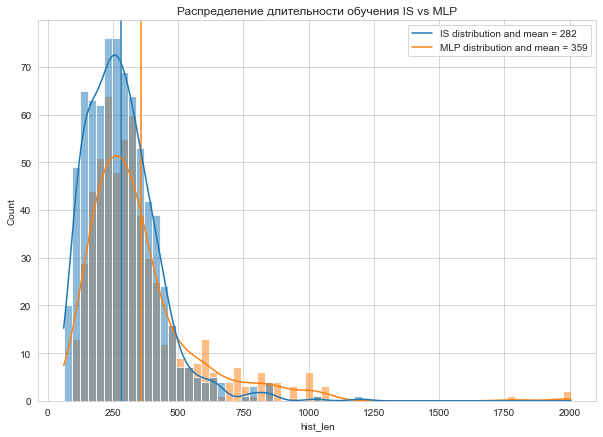

In [156]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
plt.title('Распределение длительности обучения IS vs MLP')
plt.axvline(lengths_is.mean(), color='tab:blue', label=f'IS distribution and mean = {lengths_is.mean():.0f}')
plt.axvline(lengths_mlp.mean(), color='tab:orange', label=f'MLP distribution and mean = {lengths_mlp.mean():.0f}')
sns.histplot(distr_df[distr_df['hist_len']<3000], x='hist_len', hue='type', kde=True)
plt.legend()
plt.savefig(results_path+'lengths_distribution.png', dpi=300) 
plt.show()